# Lectura y procesado

In [ ]:
import pandas as pd

data = pd.read_csv('nuevo_df.csv')
data = data.drop('Otro..especifique..1', axis=1)

print("Valores únicos antes de la limpieza:\n", data['duracion_intervencion'].unique(),'\n')

data = data[~data['duracion_intervencion'].isin(['0', 'Response'])]
#data = data.loc[data['duracion_intervencion'] != '0-5 minutos']
#data = data.loc[data['duracion_intervencion'] != '>180 minutos']

print("Valores únicos después de la limpieza:\n", data['duracion_intervencion'].unique())



Valores únicos antes de la limpieza:
 ['10-20 minutos' '20-40 minutos' '60-90 minutos' '40-60 minutos'
 '5-10 minutos' '0-5 minutos' '0' '120-180 minutos' '90-120 minutos'
 '>180 minutos' 'Response'] 

Valores únicos después de la limpieza:
 ['10-20 minutos' '20-40 minutos' '60-90 minutos' '40-60 minutos'
 '5-10 minutos' '0-5 minutos' '120-180 minutos' '90-120 minutos'
 '>180 minutos']


In [56]:
columnas_deseadas = ['Tipo.de.Intervención.Quirúrgica', 'Tipo.de.cirugía','X.Qué.material.de.regeneración.ha.sido.utilizado.','Número.de.implantes',
                     'Tipo.de.prótesis.sobre.implantes','Características.del.implante','Implante.1...Defecto.tipo.I..infraóseo..2','Alcohol','Medicación.Actual','Implante.2...Posición',
                     'duracion_intervencion']
data = data[columnas_deseadas]
data.head()
lines = []
# Resumen estadístico de las variables numéricas


# Frecuencia de valores únicos para cada columna categórica
for column in data.select_dtypes(include=['object', 'bool']):
    lines.append(f"Frecuencia de valores únicos en la columna {column}:\n")
    lines.append(data[column].value_counts().to_string())
    lines.append("\n\n")

# Escribir todo al archivo de texto
with open("frecuencia_Categorica.txt", "w") as f:
    f.writelines("\n".join(lines))

print("La información ha sido exportada a 'output.txt'")

La información ha sido exportada a 'output.txt'


In [ ]:
data.columns = ['Tipo Intervencion',
                'Tipo de Cirugia',
                "Material de regeneracion",
                "Numero de implante",
                "Tipo de Pprotesis sobre implante",
                "Caracteristicas del implante",
                "Implante 1 defecto tipo 1 infraóseo",
                "Alcohol",
               "Medicacion actual",
                "Posicion del implante",
                "duracion_intervencion"]

In [ ]:
mappings = {
    'Tipo Intervencion': {'Cirugía Dentoalveolar': 0, 'Cirugía Peri-implantaria': 1, 'Implantología Bucal':2},

    'Tipo de Cirugia': {'Cirugía combinada (regenerativa + implantoplastia)': 0, 'Cirugía resectiva': 1, 'Cirugía de acceso': 2, 'Cirugía regenerativa': 3},

    'Material de regeneracion': {'Xenoinjerto (Bio-Oss) + Membrana de colágeno reabsorbible (Bio-Gide)': 1,'0': 0},

    'Numero de implante': {'1.0': 1},

    'Tipo de Pprotesis sobre implante': {'Corona unitaria': 1, '0':0, 'Prótesis híbrida':2, 'Sobredentadura':3, 'Puente sobre implantes':4},

    'Caracteristicas del implante': {'16.0': 16},

    'Implante 1 defecto tipo 1 infraóseo': {'0': 0, 'No':1, 'Ic':2, 'Id':3},

    'Alcohol': {'No consumo': 0, 'Consumo moderado':1, 'Consumo elevado':2},

    'Medicacion actual': {'No': 0, 'Sí':1}
    }

# Aplicar el mapeo
data.replace(mappings, inplace=True)

In [ ]:
data['Tipo Intervencion'].value_counts()

Tipo Intervencion
0    2632
2     142
1      32
Name: count, dtype: int64

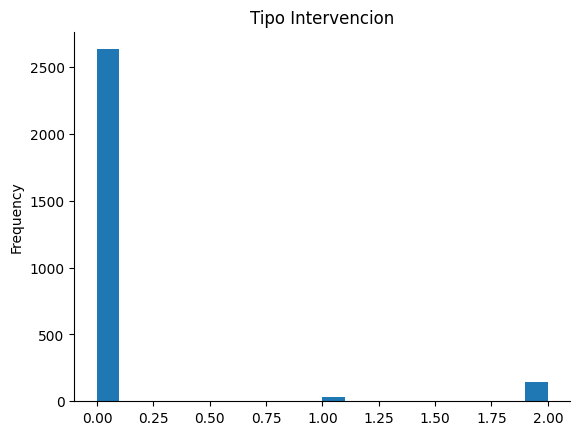

In [ ]:
# @title Tipo Intervencion

from matplotlib import pyplot as plt
data['Tipo Intervencion'].plot(kind='hist', bins=20, title='Tipo Intervencion')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Codificación Temporal**

In [ ]:
# Convertir duración de intervención a minutos
duration_mapping = {
    '>180 minutos': 180,
    '120-180 minutos': 150,
    '90-120 minutos': 105,
    '0-5 minutos': 5,
    '5-10 minutos': 7.5,
    '40-60 minutos': 50,
    '10-20 minutos': 15,
    '20-40 minutos': 30,
    '60-90 minutos': 75}

data['duracion_intervencion'] = data['duracion_intervencion'].replace(duration_mapping)

In [ ]:
data

,Tipo Intervencion,Tipo de Cirugia,Material de regeneracion,Numero de implante,Tipo de Pprotesis sobre implante,Caracteristicas del implante,Implante 1 defecto tipo 1 infraóseo,Alcohol,Medicacion actual,Posicion del implante,duracion_intervencion
0,0,0,0,0,0,0,0,0,0,0,15.0
1,0,0,0,0,0,0,0,0,0,0,30.0
2,0,0,0,0,0,0,0,0,0,0,75.0
3,0,0,0,0,0,0,0,0,1,0,15.0
4,0,0,0,0,0,0,0,0,0,0,30.0
...,...,...,...,...,...,...,...,...,...,...,...
2976,0,0,0,0,0,0,0,0,0,0,50.0
2977,0,0,0,0,0,0,0,0,0,0,15.0
2978,0,0,0,0,0,0,0,0,0,0,7.5
2979,0,0,0,0,0,0,0,1,0,0,15.0


In [ ]:
import pandas as pd

# Asumiendo que 'data' es tu DataFrame
# Primero, manejar NaN si es necesario. Ejemplo de llenado de NaNs con 0:
data = data.fillna(0)

# Convertir todas las columnas a enteros
data = data.astype(float)

# Verificar los nuevos tipos de datos
print(data.dtypes)

Tipo Intervencion                      float64
Tipo de Cirugia                        float64
Material de regeneracion               float64
Numero de implante                     float64
Tipo de Pprotesis sobre implante       float64
Caracteristicas del implante           float64
Implante 1 defecto tipo 1 infraóseo    float64
Alcohol                                float64
Medicacion actual                      float64
Posicion del implante                  float64
duracion_intervencion                  float64
dtype: object


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from math import sqrt


# Dividir los datos en conjunto de entrenamiento y prueba
X = data.drop('duracion_intervencion', axis = 1)
y = data['duracion_intervencion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de árbol de decisión para regresión
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predecir y evaluar el modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Output the Mean Squared Error to see the model performance
mse

# Calcular MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Calcular RMSE (Root Mean Squared Error)
rmse = sqrt(mse)

# Output MAE, RMSE, y el MSE previamente calculado
mae, rmse, mse

(14.68528075486828, 20.147388539586128, 405.9172649650464)

In [ ]:
!pip install smogn

In [ ]:
import smogn
import pandas as pd

data = pd.read_csv('nuevo_df.csv')
data = data.drop('Otro..especifique..1', axis=1)

print("Valores únicos antes de la limpieza:\n", data['duracion_intervencion'].unique(),'\n')

data = data[~data['duracion_intervencion'].isin(['0', 'Response'])]
#data = data.loc[data['duracion_intervencion'] != '0-5 minutos']
#data = data.loc[data['duracion_intervencion'] != '>180 minutos']

print("Valores únicos después de la limpieza:\n", data['duracion_intervencion'].unique())


# Convertir duración de intervención a minutos
duration_mapping = {
    '>180 minutos': 180,
    '120-180 minutos': 150,
    '90-120 minutos': 105,
    '0-5 minutos': 5,
    '5-10 minutos': 7.5,
    '40-60 minutos': 50,
    '10-20 minutos': 15,
    '20-40 minutos': 30,
    '60-90 minutos': 75}

data['duracion_intervencion'] = data['duracion_intervencion'].replace(duration_mapping)

data['duracion_intervencion'] = pd.to_numeric(data['duracion_intervencion'])

Valores únicos antes de la limpieza:
 ['10-20 minutos' '20-40 minutos' '60-90 minutos' '40-60 minutos'
 '5-10 minutos' '0-5 minutos' '0' '120-180 minutos' '90-120 minutos'
 '>180 minutos' 'Response'] 

Valores únicos después de la limpieza:
 ['10-20 minutos' '20-40 minutos' '60-90 minutos' '40-60 minutos'
 '5-10 minutos' '0-5 minutos' '120-180 minutos' '90-120 minutos'
 '>180 minutos']


<ipython-input-38-50869461e366>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['duracion_intervencion'] = data['duracion_intervencion'].replace(duration_mapping)
<ipython-input-38-50869461e366>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['duracion_intervencion'] = pd.to_numeric(data['duracion_intervencion'])


In [ ]:
import pandas as pd
import smogn

# Función para convertir rangos de cadenas a puntos medios numéricos o manejar valores únicos
def convert_range_to_midpoint(range_str):
    if isinstance(range_str, str):
        if ' minutos' in range_str:
            range_str = range_str.replace(' minutos', '')
        parts = range_str.split('-')
        if len(parts) == 2:
            start = int(parts[0].strip())
            end = int(parts[1].strip())
            return (start + end) / 2
        elif len(parts) == 1 and parts[0].strip().isdigit():
            return int(parts[0].strip())
        else:
            raise ValueError(f"Formato inesperado para el rango: {range_str}")
    elif isinstance(range_str, (int, float)):
        return range_str
    else:
        raise ValueError(f"Valor no string encontrado: {range_str}")

# Verificar las columnas del DataFrame
print("Columnas en el DataFrame:", data.columns)

# Verificar si la columna 'duracion_intervencion' existe
if 'duracion_intervencion' not in data.columns:
    raise ValueError("La columna 'duracion_intervencion' no existe en el DataFrame")

# Mostrar las primeras filas del DataFrame para inspeccionar su estructura
print(data.head())

# Aplicar la función de conversión a la columna 'duracion_intervencion'
data['duracion_intervencion_numeric'] = data['duracion_intervencion'].apply(convert_range_to_midpoint)

# Verificar la conversión
print(data[['duracion_intervencion', 'duracion_intervencion_numeric']].head())

# Ejecutar el proceso SMOGN
try:
    housing_smogn = smogn.smoter(data=data, y='duracion_intervencion_numeric')
    print("El proceso SMOGN se completó con éxito")
except Exception as e:
    print(f"Se produjo un error: {e}")


Columnas en el DataFrame: Index(['Medicación.Actual', 'Alcohol', 'Otras.Drogas', 'Tuberculosis',
       'Nitratos.orgánicos', 'Hormonas.pancreáticas', 'Antitusígenos',
       'Fármacos.otológicos', 'Otro..especifique..1',
       'Tipo.de.Intervención.Quirúrgica',
       ...
       'Implante.5...Posición.2', 'Implante.5...Defecto.tipo.I..infraóseo..2',
       'Implante.5...Defecto.tipo.II..supraóseo..2', 'Implante.6...Posición.1',
       'Implante.6...Defecto.tipo.I..infraóseo..1',
       'Implante.6...Defecto.tipo.II..supraóseo..1', 'Implante.7...Posición',
       'Implante.7...Defecto.tipo.I..infraóseo.',
       'Implante.7...Defecto.tipo.II..supraóseo.', 'duracion_intervencion'],
      dtype='object', length=101)
  Medicación.Actual     Alcohol Otras.Drogas  Tuberculosis  \
0                No  No consumo           No             0   
1                No  No consumo           No             0   
2                No  No consumo           No             0   
3                Sí  No con

ValueError: Formato inesperado para el rango: >180